In [6]:
!pip install wordcloud

In [14]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import re
import warnings
warnings.filterwarnings('ignore', category = DeprecationWarning)

In [9]:
dataset = pd.read_csv('/content/tweets.csv', names=['Sentiment', 'Id', 'Date', 'Flag', 'User', 'Tweet'], encoding='ISO-8859-1')

In [10]:
print("Total tweets in the dataset: {} Million".format(dataset.shape[0]/1000000.0))

Total tweets in the dataset: 1.6 Million


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Sentiment  1600000 non-null  int64 
 1   Id         1600000 non-null  int64 
 2   Date       1600000 non-null  object
 3   Flag       1600000 non-null  object
 4   User       1600000 non-null  object
 5   Tweet      1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [15]:
# Sentiment Labeling
dataset['Sentiment_Label'] = dataset['Sentiment'].map({0: 'Negative', 4: 'Positive'})

# Convert Date Column to Datetime Type
dataset['Date'] = pd.to_datetime(dataset['Date'], errors='coerce')

# Tweet Preprocessing - Clean URLs, Usernames, Hashtags, etc.
dataset['Cleaned_Tweet'] = dataset['Tweet'].apply(lambda x: re.sub(r'(@\w+|https?://\S+|#)', '', x))

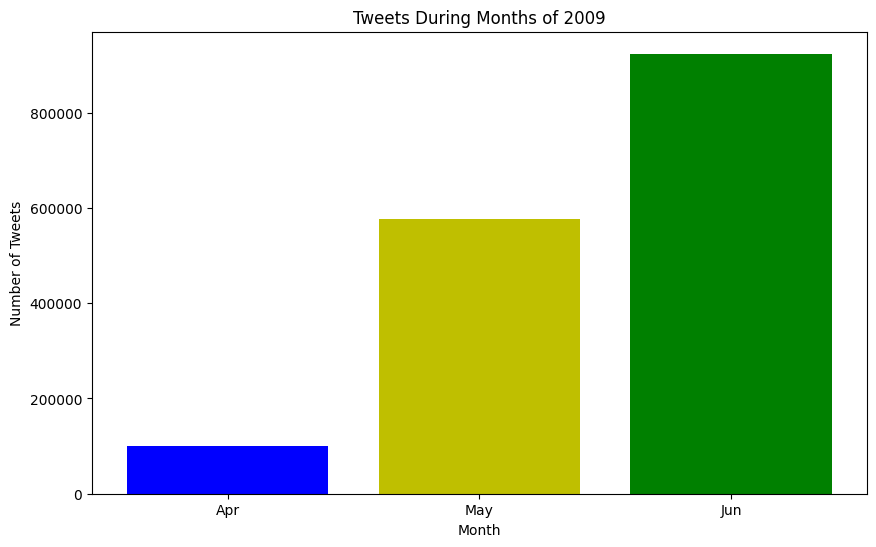

In [23]:
# Monthly Tweet Counts
dataset['Month'] = dataset['Date'].dt.month_name().str[:3]
months_count = dataset['Month'].value_counts()

plt.figure(figsize=(10, 6))
months_count = months_count.loc[['Apr', 'May', 'Jun']]  # Order months manually
plt.bar(months_count.index, months_count.values, color=['b', 'y', 'g'])
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.title('Tweets During Months of 2009')
plt.show()

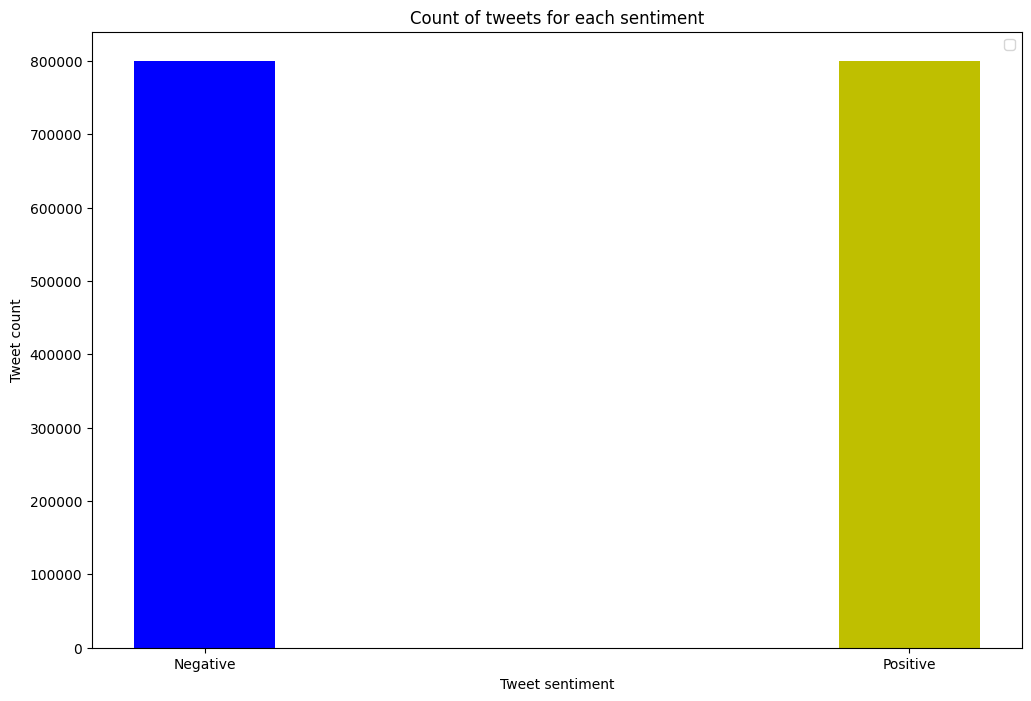

In [22]:
class_count = dataset['Sentiment'].value_counts() # Returned in descending order [4, 0]
plt.figure(figsize = (12, 8))
plt.xticks([4, 0], ['Positive', 'Negative'])
plt.xticks([4, 0])
plt.bar(x = class_count.keys(),
        height = class_count.values,
        color = ['b', 'y'])
plt.xlabel("Tweet sentiment")
plt.ylabel("Tweet count")
plt.title("Count of tweets for each sentiment")
plt.legend()

In [17]:
# Drop Unnecessary Columns
dataset = dataset.drop(['Id', 'Flag', 'User'], axis=1)

In [18]:
# Word Clouds for Positive and Negative Tweets
positive_tweets = ' '.join(dataset[dataset['Sentiment'] == 4]['Cleaned_Tweet'].str.lower())
negative_tweets = ' '.join(dataset[dataset['Sentiment'] == 0]['Cleaned_Tweet'].str.lower())

In [19]:
# Filter out commonly found words like 'lol', 'quot'
custom_stopwords = set(STOPWORDS).union({"lol", "quot"})

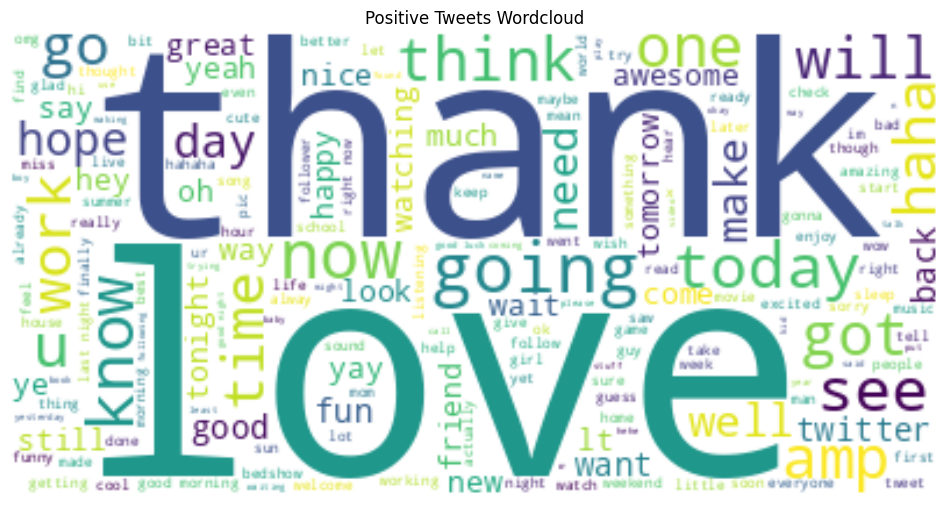

In [20]:
plt.figure(figsize=(12, 8))
wordcloud_pos = WordCloud(stopwords=custom_stopwords, background_color="white", max_words=1000).generate(positive_tweets)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Tweets Wordcloud")
plt.show()


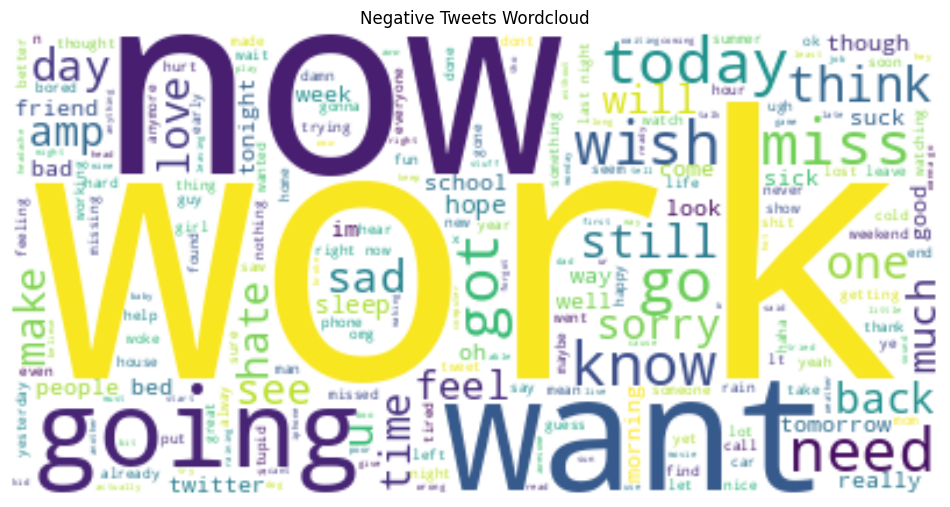

In [21]:
plt.figure(figsize=(12, 8))
wordcloud_neg = WordCloud(stopwords=custom_stopwords, background_color="white", max_words=1000).generate(negative_tweets)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Tweets Wordcloud")
plt.show()